<a href="https://colab.research.google.com/github/Luis-Eduardo-P-Ch/Time-Series_-Exploration-and-Preprocessing/blob/main/Times%20Series%20with%20Python_%20Exploratory%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contenido
*Entendiendo la data

1)Generación de las hipótesis

2)Obtener un sistema para cargar la data

3)Contenido y estructura de la data

4)Extracción de características

5) Análisis Exploratorio 

# 1) Generación de la Hipótesis

1. Habrá un aumento en el tráfico a medida que pasen los años

* Explicación: la población tiene una tendencia ascendente general con el tiempo, por lo que puedo esperar que más personas viajen en JetRail, generalmente las empresas expanden sus negocios con el tiempo, lo que lleva a que más clientes viajen a través de JeRail.

2. El tráfico será alto de mayo a octubre.
*Explicación- Las visitas turísticas generalmente aumentan durante este período de tiempo

3. El tráfico entre semana será mayor en comparación con los fines de semana/días festivos.
*Explicación: la gente irá a la oficina entre semana y, por lo tanto, el tráfico será mayor

4. El tráfico durante las horas pico será alto.
*explicación: la gente viajará al trabajo, a la universidad.

Intentaremos validar cada una de estas hipótesis basándonos en el conjunto de datos. ahora echemos un vistazo al conjunto de datos


# 2) Preparando el Sistema y cargando los datos

## Importamos todos los paquetes que estaremos usando 

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from datetime import datetime

In [6]:
from pandas import Series

In [7]:
%matplotlib inline

In [8]:
import warnings

In [9]:
warnings.filterwarnings("ignore")

##Ahora cargamos las bases de datos: Train y Test

In [10]:
from google.colab  import files
files.upload()

Saving Train_SU63ISt.csv to Train_SU63ISt.csv


{'Train_SU63ISt.csv': b'ID,Datetime,Count\r\n0,25-08-2012 00:00,8\r\n1,25-08-2012 01:00,2\r\n2,25-08-2012 02:00,6\r\n3,25-08-2012 03:00,2\r\n4,25-08-2012 04:00,2\r\n5,25-08-2012 05:00,2\r\n6,25-08-2012 06:00,2\r\n7,25-08-2012 07:00,2\r\n8,25-08-2012 08:00,6\r\n9,25-08-2012 09:00,2\r\n10,25-08-2012 10:00,2\r\n11,25-08-2012 11:00,6\r\n12,25-08-2012 12:00,4\r\n13,25-08-2012 13:00,2\r\n14,25-08-2012 14:00,6\r\n15,25-08-2012 15:00,2\r\n16,25-08-2012 16:00,2\r\n17,25-08-2012 17:00,2\r\n18,25-08-2012 18:00,2\r\n19,25-08-2012 19:00,2\r\n20,25-08-2012 20:00,2\r\n21,25-08-2012 21:00,6\r\n22,25-08-2012 22:00,2\r\n23,25-08-2012 23:00,2\r\n24,26-08-2012 00:00,4\r\n25,26-08-2012 01:00,6\r\n26,26-08-2012 02:00,2\r\n27,26-08-2012 03:00,4\r\n28,26-08-2012 04:00,2\r\n29,26-08-2012 05:00,2\r\n30,26-08-2012 06:00,2\r\n31,26-08-2012 07:00,2\r\n32,26-08-2012 08:00,2\r\n33,26-08-2012 09:00,4\r\n34,26-08-2012 10:00,2\r\n35,26-08-2012 11:00,2\r\n36,26-08-2012 12:00,8\r\n37,26-08-2012 13:00,6\r\n38,26-08-2012 1

In [11]:
train=pd.read_csv("Train_SU63ISt.csv")

In [12]:
train


,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [13]:
from google.colab  import files
files.upload()

Saving Test_0qrQsBZ.csv to Test_0qrQsBZ.csv


{'Test_0qrQsBZ.csv': b'ID,Datetime\r\n18288,26-09-2014 00:00\r\n18289,26-09-2014 01:00\r\n18290,26-09-2014 02:00\r\n18291,26-09-2014 03:00\r\n18292,26-09-2014 04:00\r\n18293,26-09-2014 05:00\r\n18294,26-09-2014 06:00\r\n18295,26-09-2014 07:00\r\n18296,26-09-2014 08:00\r\n18297,26-09-2014 09:00\r\n18298,26-09-2014 10:00\r\n18299,26-09-2014 11:00\r\n18300,26-09-2014 12:00\r\n18301,26-09-2014 13:00\r\n18302,26-09-2014 14:00\r\n18303,26-09-2014 15:00\r\n18304,26-09-2014 16:00\r\n18305,26-09-2014 17:00\r\n18306,26-09-2014 18:00\r\n18307,26-09-2014 19:00\r\n18308,26-09-2014 20:00\r\n18309,26-09-2014 21:00\r\n18310,26-09-2014 22:00\r\n18311,26-09-2014 23:00\r\n18312,27-09-2014 00:00\r\n18313,27-09-2014 01:00\r\n18314,27-09-2014 02:00\r\n18315,27-09-2014 03:00\r\n18316,27-09-2014 04:00\r\n18317,27-09-2014 05:00\r\n18318,27-09-2014 06:00\r\n18319,27-09-2014 07:00\r\n18320,27-09-2014 08:00\r\n18321,27-09-2014 09:00\r\n18322,27-09-2014 10:00\r\n18323,27-09-2014 11:00\r\n18324,27-09-2014 12:00\r\n

In [14]:
test=pd.read_csv("Test_0qrQsBZ.csv")

## Realizamos una copia de las bases de datos de forma que si se hacen cambios en los datos no afectan la base original

In [15]:
train_original=train.copy()

In [16]:
test_original=test.copy()

In [17]:
train_original

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


# 3) Estructura de los datos y Contenido

## Empecemos revisando la base de datos.
Primero miremos las caracteristicas de la base de datos train y test.

In [18]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [19]:
train.describe()

,ID,Count
count,18288.000000,18288.000000
mean,9143.500000,138.958115
std,5279.435197,153.467461
min,0.000000,2.000000
25%,4571.750000,22.000000
50%,9143.500000,84.000000
75%,13715.250000,210.000000
max,18287.000000,1244.000000


In [20]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [21]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [22]:
test.head()


,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [23]:
test.describe()

,ID
count,5112.000000
mean,20843.500000
std,1475.851619
min,18288.000000
25%,19565.750000
50%,20843.500000
75%,22121.250000
max,23399.000000


### Tenemos ID, Datetime y la cantidad de pasajeros en la base de datos train.

Para la base de datos test tenemos: ID y datetime solamente, asi que necesitariamos predecir la cantidad para esta base de datos.

Pero antes, entendamos las características:
* ID e el numero unico que se le da a cada observación
* Datetime es el tiempo de cada observacion
* Count es la cantidad de pasajeros correspondiente a cada fecha y hora

### Veamos ahora el tipo de datos y sus características 

In [24]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [25]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [26]:
### Vemos que:
ID y Count tienen formato entero mientras que la fecha y hora está en el objeto para el archivo de train

Id está en número entero y Datetime está en formato de objeto para el archivo de test

SyntaxError: ignored

## Ahora veremos la forma del conjunto de datos


In [27]:
train.shape

(18288, 3)

In [28]:
test.shape

(5112, 2)

## Tenemos 18288 diferentes registros para el conteo de pasajeros en Train y 5112 en la base Test

# 4) Características de extraction

## Extraeremos la hora y la fecha del archivo datetime. Hemos visto anteriormente que el tipo de datos de Datetime es object. Entonces, antes que nada, tenemos que cambiar el tipo de datos al formato de fecha y hora; de lo contrario, no podemos extraer características de él.

In [29]:
train['Datetime']= pd.to_datetime(train.Datetime, format= '%d-%m-%Y %H:%M')

In [30]:
test['Datetime']= pd.to_datetime(test.Datetime, format= '%d-%m-%Y %H:%M')

In [31]:
test_original['Datetime']= pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')

In [32]:
train_original['Datetime']= pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')

## Hicimos algunas hipótesis sobre los efectos de la hora, el día, el mes y el año en el recuento de pasajeros.
Entonces, extraigamos el año, mes, día y hora de Datetime para validar nuestra hipótesis.

In [33]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

##También hicimos una hipótesis para el patrón entre semana y fin de semana. Entonces, hagamos una variable de fin de semana para visualizar el fin de semana en el tráfico.

 1) Primero extraeremos el día de la semana de Datetime y luego, en función de los valores, asignaremos si el día es fin de semana o no.

2) Valores de 5 y 6 representa que los días son fin de semana

In [34]:
train['day of week']=train['Datetime'].dt.dayofweek

In [35]:
temp=train['Datetime']

##  Designamos 1 si el dia dela semana es un fin de semana y 0 si el dia dela semana no es fin de semana. 

In [36]:
def applyer(row):
       if row.dayofweek == 5 or row.dayofweek == 6:
         return 1
       else:
         return 0
temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

## Ahora veamos a la serie de tiempo. 

In [37]:
train.index=train['Datetime']   # indexamos la fecha y hora para obtener el período de tiempo en el eje x

In [38]:
df=train.drop('ID',1)   # eliminamos la variable ID solo para obtener la fecha y hor en el eje x

In [39]:
ts=df['Count']

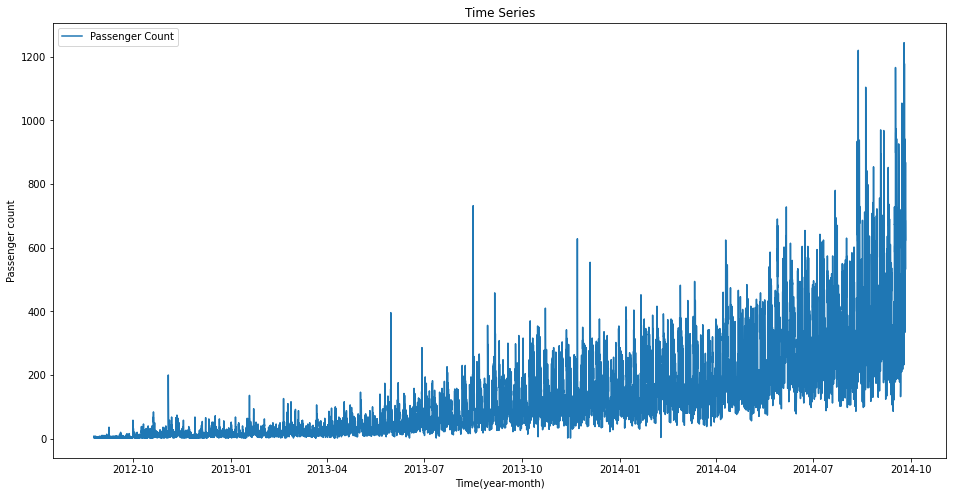

In [40]:
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')


#  Conclusion de nuestro análisis Preliminar
 Aquí podemos inferir que hay una tendencia creciente en la serie, es decir, el número de conteos está aumentando con respecto al tiempo. También podemos ver que en ciertos puntos hay un aumento repentino en el número de conteos. La posible razón detrás de esto podría ser que en un día en particular, debido a un evento, el tráfico era alto.

Continuare trabajndo en el archivoTrain para los análisis y usaré el archivo test para las proyecciones

# 5) Analisis Exploratorio 

## Tratemos de Verificar las hipótesis con los datos



### Hipótesis 1: "El tráfico aumentará a medida que pasen los años"

<AxesSubplot:xlabel='year'>

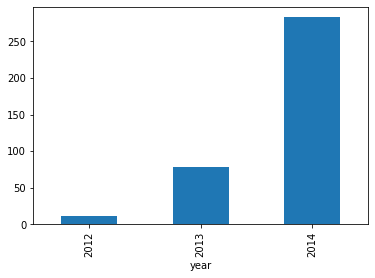

In [42]:
train.groupby('year')['Count'].mean().plot.bar()

#### Se observa un crecimiento exponencial en el tráfico con respecto al año. Esto valida la hipótesis 1

### Hipótesis 2: "El tráfico se incrementa desde mayo a Octubre"

<AxesSubplot:xlabel='month'>

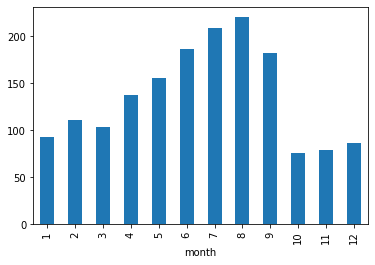

In [43]:
train.groupby('month')['Count'].mean().plot.bar()

#### Esta vez se observa un decrecimiento en la media de la cantidad de pasajeros en los últimos tres meses. Esto no luce muy bien, por lo cual veamos la media mensual por cada año separado. 

In [44]:
temp=train.groupby(['year','month'])['Count'].mean()

<AxesSubplot:title={'center':'Passenger Count(Monthwise'}, xlabel='year,month'>

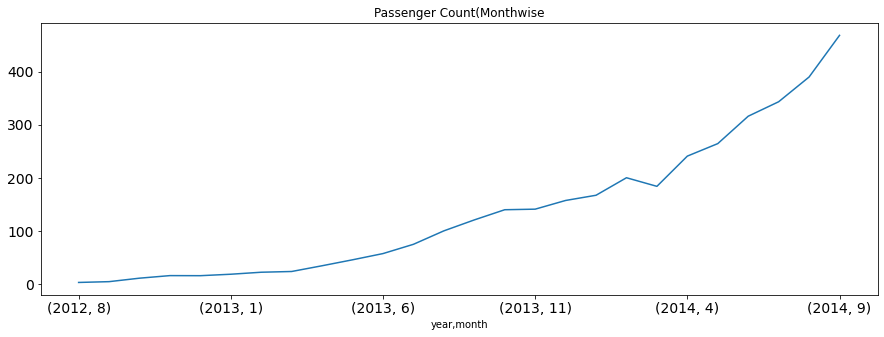

In [45]:
temp.plot(figsize=(15,5), title='Passenger Count(Monthwise', fontsize=14)

#### 
>Se observa que los meses 10, 11 y 12 no estan presentes para el año 2014 y el valor medio para estos meses en el año 2012 es muy inferior

>Dado que hay una tendencia creciente en nuestra serie temporal, el valor medio para el resto de los meses será mayor debido a su mayor número de pasajeros en el año 2014 y obtendremos un valor menor para estos 3 meses

>En el diagrama de lineas se observa una tendencia creciente en el conteo mensual de pasajeros y el crecimiento es aproximadamente exponencial

#### Revisemos la media diaria de conteo de pasajeros

<AxesSubplot:xlabel='day'>

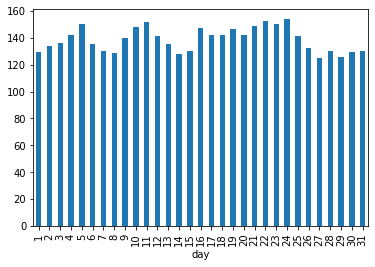

In [49]:
train.groupby('day')['Count'].mean().plot.bar()

####  No obtenemos mucha información del conteio diario de pasajeros

### Hipótesis 3: El tráfico será mayor durante las horas pico

<AxesSubplot:xlabel='Hour'>

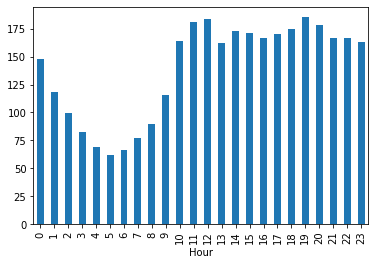

In [50]:
train.groupby('Hour')['Count'].mean().plot.bar()

####> Se puede infereir que el pico de tráfico es a las 7 Pm y luego vemos una tendencia decreciente hasta las 5 a.m

> Después de eso, el conteo de pasajeros comienza a aumentar nuevamente y alcanza su punto máximo entre las 11am y las 12 (media noche)

### Hipótesis 4: "El tráfico será mayor los fines de semana"

<AxesSubplot:xlabel='weekend'>

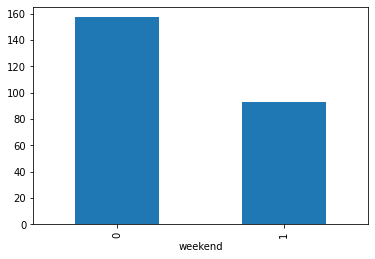

In [51]:
train.groupby('weekend')['Count'].mean().plot.bar()

#### Se puede inferir de la gráfica que el tráfico es más entre semana en comparación con los fines de semana, lo que valida la hipótesis

## Ahora intentaremos ver el conteo de pasajeros por día

<AxesSubplot:xlabel='day of week'>

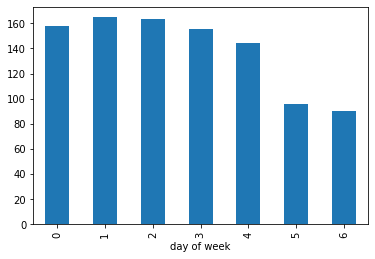

In [52]:
train.groupby('day of week')['Count'].mean().plot.bar()

Del gráfico de barras anterior, podemos inferir que el pasajero es menos para el sábado y el domingo en comparación con los otros días de la semana.

Ahora veremos las técnicas básicas de modelado. Antes dejaremos caer la variable ID ya que no tiene nada que ver con el conteo de pasajeros

In [54]:
train=train.drop('ID',1)

Como hemos visto que hay mucho ruido en la serie temporal horaria, agregaremos la serie temporal horaria a series temporales diarias, semanales y mensuales para reducir el ruido y hacerlo más estable y, por lo tanto, sería más fácil para un modelo aprender

In [55]:
train.Timestamp= pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')

In [56]:
train.index=train.Timestamp

Series de tiempo por hora

In [57]:
hourly=train.resample('H').mean()

Convirtiendo a la media diaria

In [58]:
daily=train.resample('D').mean()

Convirtiendo a la media semanal

In [59]:
weekly=train.resample('W').mean()

Convirtiendo a la media mensual 

In [60]:
monthly=train.resample('M').mean()

Veamos ahora las series creadas (horas, dias, semanas, meses)

<AxesSubplot:title={'center':'Monthly'}, xlabel='Datetime'>

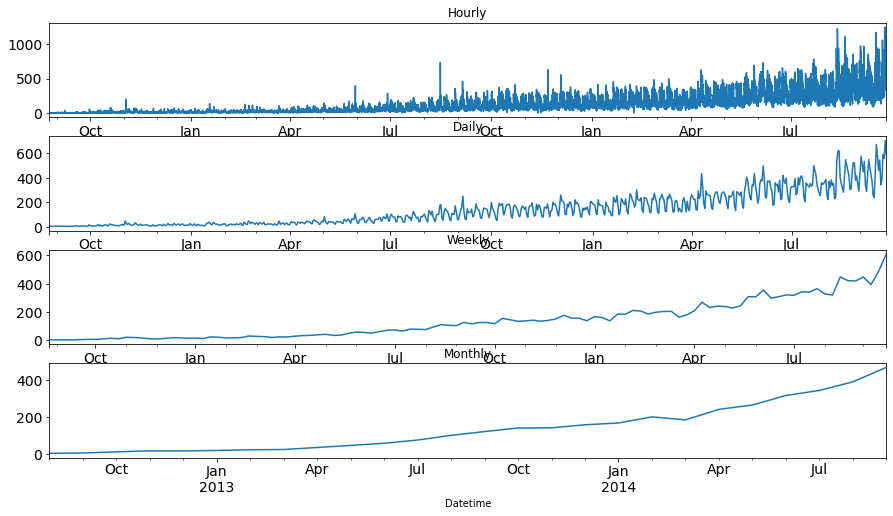

In [65]:
fig, axs=plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title='Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title='Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8),title='Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title='Monthly', fontsize=14, ax=axs[3])

Podemos ver que la serie temporal se vuelve cada vez más estable cuando la agregamos en forma diaria, semanal y mensual.

Pero sería difícil convertir las predicciones mensuales y semanales en predicciones por horas, ya que primero tenemos que convertir las predicciones mensuales en predicciones semanales, semanales en diarias y horarias, lo que se convertirá en un proceso muy extenso. Entonces, trabajaremos en la serie de tiempo diaria.

In [66]:
test.Timestamp= pd.to_datetime(test.Datetime, format='%d-%m-%Y %H;%M')

In [67]:
test.index=test.Timestamp

Convertimos a la media diara

In [68]:
test=test.resample('D').mean()

In [69]:
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')

In [70]:
train.index=train.Timestamp

Convertimos a la media diaria

In [71]:
train=train.resample('D').mean()